# Part 2: Simple Text Processing - Tokenization, Lemmatization, Word Frequency, Vectorization

In this part, we use `SpaCy` to do simple text processing of the speeches. This package is included in the `environment.yml`, but please download `en_core_web_sm`, an English language text processing model. Run the following code after activating the `sotu` environment.

```
python -m spacy download en_core_web_sm
```

### Read Data

In [4]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-dark')

In [5]:
# load the data
sou = pd.read_csv('data/SOTU.csv')
sou

,President,Year,Text,Word Count
0,Joseph R. Biden,2024.0,"\n[Before speaking, the President presented hi...",8003
1,Joseph R. Biden,2023.0,\nThe President. Mr. Speaker——\n[At this point...,8978
2,Joseph R. Biden,2022.0,"\nThe President. Thank you all very, very much...",7539
3,Joseph R. Biden,2021.0,\nThe President. Thank you. Thank you. Thank y...,7734
4,Donald J. Trump,2020.0,\nThe President. Thank you very much. Thank yo...,6169
...,...,...,...,...
241,George Washington,1791.0,\nFellow-Citizens of the Senate and House of R...,2264
242,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
243,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
244,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069


### 1. Processing Speeches with the SpaCy nlp module

In [6]:
import spacy
from tqdm import tqdm
from collections import Counter

nlp = spacy.load("en_core_web_sm")

In [7]:
# subset the speech dataframe for speeches from 2000 and onwards
sou_recent_years = sou[sou['Year'] >= 2000]

In [8]:
# Process each speeches using the 'nlp' function
# should take about 30 seconds to process

nlp_speeches = []

for idx, row in sou_recent_years.iterrows():
    parsed_txt = nlp(row.Text)

    nlp_speeches.append(parsed_txt)

### 2. Analyze Tokens vs Lemmas

#### Token List
*Tokens* are a single word or piece of a word. In the next cell, we create a list of tokens across all speeches, excluding spaces, stopwords, or punctuation. All tokens are made lowercase.

In [9]:
token_list = []

for doc in nlp_speeches:
    for token in doc:
        if not token.is_space and not token.is_stop and not token.is_punct:
            token_list.append(token.text.lower())

In [10]:
# print top 20 tokens

token_count = Counter(token_list).most_common(20)
token_count

[('america', 816),
 ('people', 637),
 ('american', 582),
 ('new', 530),
 ('years', 439),
 ('americans', 437),
 ('world', 425),
 ('year', 406),
 ('country', 369),
 ('jobs', 348),
 ('tonight', 344),
 ('work', 324),
 ('know', 323),
 ('let', 320),
 ('congress', 317),
 ('nation', 311),
 ('time', 301),
 ('help', 282),
 ('need', 266),
 ('tax', 255)]

#### Lemma List

*Lemmas* are the core component of a word, e.g., "complete" is the lemma for "completed" and "completely". In the next cell, we extract the lemmas across all the speeches, excluding spaces, stopwords, and punctuation.

In [11]:
lemma_list = []

for doc in nlp_speeches:
    for token in doc:
        if not token.is_space and not token.is_stop and not token.is_punct:
            lemma_list.append(token.lemma_.lower())

In [12]:
# print top 20 lemmas

lemma_count = Counter(lemma_list).most_common(20)
lemma_count

[('year', 845),
 ('america', 816),
 ('people', 639),
 ('american', 587),
 ('work', 557),
 ('new', 532),
 ('job', 486),
 ('country', 435),
 ('americans', 432),
 ('world', 426),
 ('know', 395),
 ('nation', 388),
 ('help', 378),
 ('need', 353),
 ('time', 351),
 ('tonight', 344),
 ('child', 332),
 ('let', 326),
 ('congress', 317),
 ('come', 301)]

#### Token versus Lemma Comparison

When we compare the top tokens vs the top lemmas, we can see that there's a difference in the output. This is because lemmas recognizes the core component of the word, whereas tokens counts words with similar roots as separate tokens. For example, we counted 439 'years' and 406 'year' in the tokens list. This results in a total of 845 'year' in the lemmas list. Similarly, the lemma 'child' has a count of 332 whereas it doesn't appear as a top word in the tokens list because 'child' has been split amongst other words such as 'children' and 'child.' Therefore, lemmas are better at capturing the core components and counts of tokens that have similar roots.

### 3. Analyze Common Word Distributions Over Different Years

#### Common Words per Year Function

In the next cell, we create a function that takes the dataset and a year as an input and outputs the top n lemmas for that year’s speeches.

In [13]:
def get_most_common_words(df, year, n=25):
    """
    Processes the SOTU speech for a given year and returns
    the most common non-stopword/punctuation lemmas.

    inputs:
    - df raw unprocessed sou dataframe
    - year
    - number of desired outputs, n
    
    output:
    - the n most common lemmas with their corresponding counts across all speeches for that year
    """

    # Subset the dataframe for the year of interest
    df_subset = df[df['Year'] == int(year)]

    # Process the text with spaCy
    for idx, row in df_subset.iterrows():
        parsed_txt = nlp(row.Text)

    # Get the lemmas across all of the speeches
        lemma_list = []
        for token in parsed_txt:
            if not token.is_space and not token.is_stop and not token.is_punct:
                lemma_list.append(token.lemma_.lower())

    # Count top n lemmas
    lemma_counts = Counter(lemma_list).most_common(n)

    return lemma_counts

In [14]:
# test the function on the year 2024
get_most_common_words(df=sou, year=2024, n=10)

[('president', 58),
 ('year', 45),
 ('america', 44),
 ('american', 34),
 ('people', 33),
 ('$', 33),
 ('member', 32),
 ('want', 29),
 ('audience', 29),
 ('know', 29)]

#### Compare 2023 to 2017

Here, we compare the top 20 words for 2017 and 2023. We use the function defined above to obtain the top 20 words and plot the words and their frequencies in a barchart to compare them.

In [15]:
words_2023 = get_most_common_words(df=sou, year=2023, n=20)
words_2017 = get_most_common_words(df=sou, year=2017, n=20)

In [16]:
words_2023

[('year', 58),
 ('go', 56),
 ('let', 45),
 ('know', 40),
 ('people', 39),
 ('job', 38),
 ('america', 36),
 ('come', 33),
 ('law', 33),
 ('pay', 33),
 ('american', 31),
 ('$', 31),
 ('president', 30),
 ('look', 27),
 ('world', 25),
 ('folk', 24),
 ('nation', 24),
 ('audience', 23),
 ('work', 23),
 ('right', 23)]

In [17]:
words_2017

[('american', 34),
 ('america', 29),
 ('country', 26),
 ('nation', 21),
 ('great', 20),
 ('new', 19),
 ('year', 19),
 ('world', 18),
 ('job', 15),
 ('people', 15),
 ('americans', 14),
 ('united', 13),
 ('tonight', 13),
 ('states', 12),
 ('work', 12),
 ('child', 12),
 ('want', 12),
 ('time', 12),
 ('citizen', 11),
 ('right', 11)]

In [18]:
# put the words and counts into a pd Dataframe for better structure and to make plotting easier
df_2017 = pd.DataFrame(words_2017, columns=['Word', 'Count'])
df_2023 = pd.DataFrame(words_2023, columns=['Word', 'Count'])

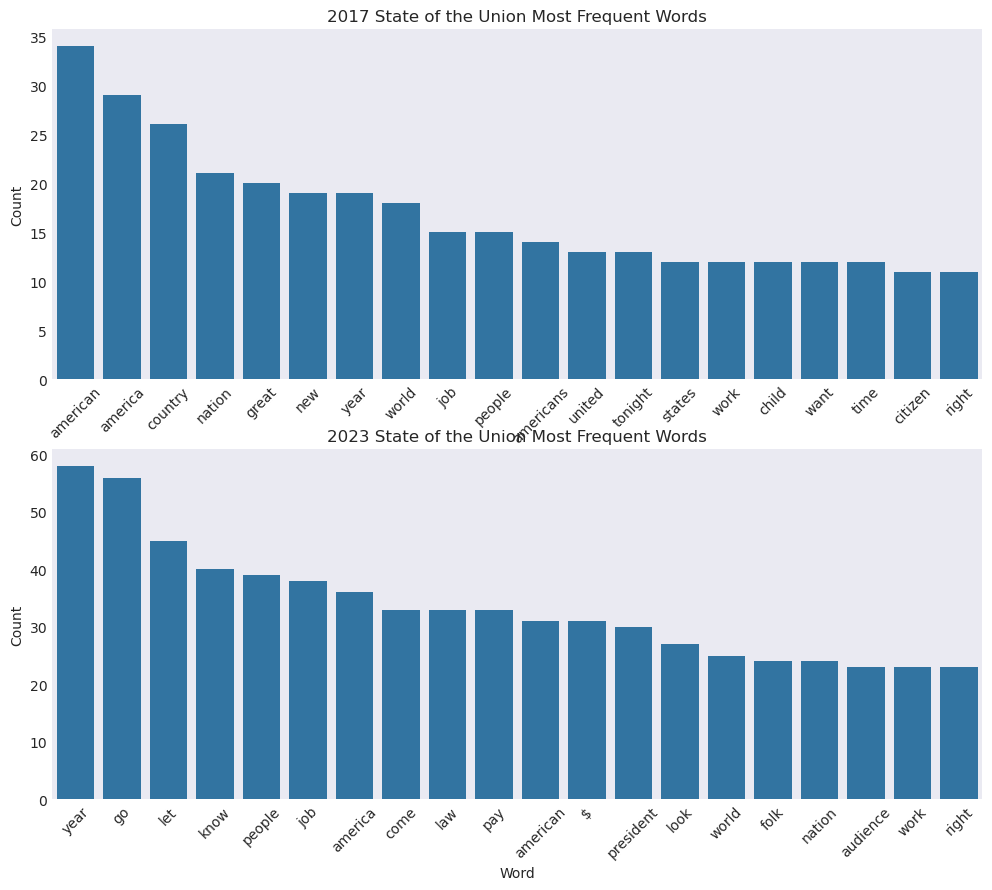

In [20]:
import seaborn as sns

fig, axs = plt.subplots(nrows=2, figsize=(12,10))

sns.barplot(df_2017, x='Word', y='Count', ax=axs[0]).tick_params(axis='x', rotation=45)
sns.barplot(df_2023, x='Word', y='Count', ax=axs[1]).tick_params(axis='x', rotation=45)

axs[0].set_title('2017 State of the Union Most Frequent Words')
axs[1].set_title('2023 State of the Union Most Frequent Words')

plt.savefig("outputs/2017v2023_most_frequent_words.png", bbox_inches="tight")

### 4. TF-IDF Vectorization

To use statsitical alorithms on documents, we need to transform them into vectors, where each element of the vector corresponds to a particular word in a document or corpus of documents. To do so, we train a Term Frequency-Inverse Document Frequency (TF-IDF) vectorization model.

Here we output the feature vectors and plot all the speeches on a 2-D grid using PCA and also using a heatmap, and examine TF-IDF scores for the top 10 most common words in the first speech.

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

#from nltk.tokenize.casual import casual_tokenize

#### Train the Vectorizer and Transform the Data

In [22]:
raw_docs = sou["Text"].to_list()

In [23]:
tfidf_model = TfidfVectorizer() # select model; leave tokenizer blank to use default tokenization model; alternatively, use casual_tokenize from nltk

tfidf_vectors = tfidf_model.fit_transform(raw_documents=raw_docs).toarray() # fit model

The output of `fit_transform()` will be a matrix where each row corresponds to a speech, each column corresponds to a word in the corpus of speeches, and the value is the TF-IDF score which measures the importance of that word in that speech, relative to the rest of the speeches.

#### Plot Speeches

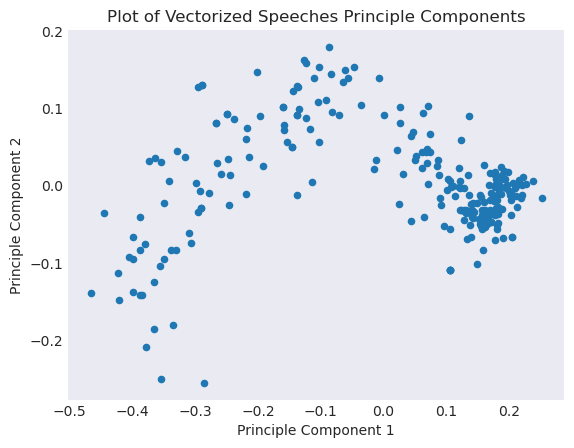

In [24]:
# Set PCA to find first 2 principal components
pca = PCA(n_components=2)

# Create a new dataframe where each row is a speech, and each column is a projection onto
# one of the two principal components
name_of_vector_array = tfidf_vectors
df2d = pd.DataFrame(pca.fit_transform(name_of_vector_array), columns=list('xy'))

# Plot Data Visualization (Matplotlib)
df2d.plot(kind='scatter', x='x', y='y')
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.title("Plot of Vectorized Speeches Principle Components")
plt.savefig("outputs/vectorized_speeches_principle_components.png")
plt.show()

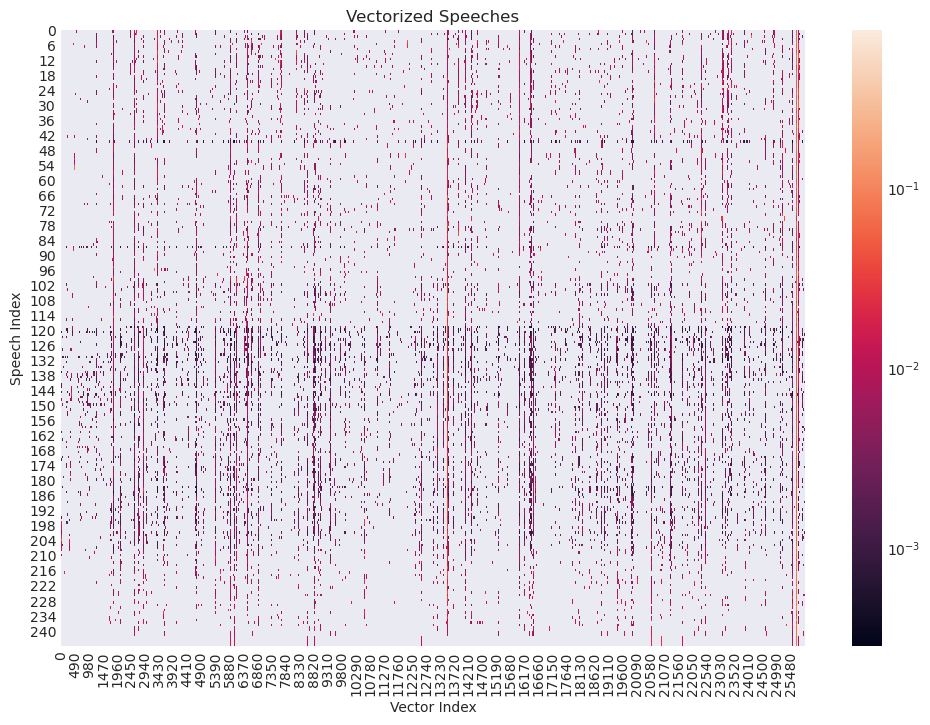

In [32]:
from matplotlib.colors import LogNorm

# use this if tfidf was not already made into an array
#dense_array = tfidf_vectors.toarray() # densify

# shift dense array since LogNorm can't handle zeroes
eps = 1e-9
shifted = tfidf_vectors + eps

plt.figure(figsize=(12, 8))
sns.heatmap(tfidf_vectors, norm=LogNorm())
plt.title("Vectorized Speeches")
plt.xlabel("Vector Index")
plt.ylabel("Speech Index")
plt.savefig("outputs/vectorized_speeches_heat_map.png")
plt.show()

#### Get the TF-IDF value for certain words and documents

In [19]:
word_list = ['year',
 'america',
 'people',
 'american',
 'work',
 'new',
 'job',
 'country',
 'americans',
 'world'] # top ten most common words through whole corpus

In [20]:
word_nums = [tfidf_model.vocabulary_[word] for word in word_list] # get each word's index number using the .vocabular_ attributed of vectorizer

In [21]:
idf_score = [tfidf_model.idf_[i] for i in word_nums] # get their IDF score by using .idf_ at the indices from the previous step

In [22]:
tf_idf = [tfidf_vectors[0][i] for i in word_nums] # get the tf_idf score for the first speech

In [23]:
pd.DataFrame({"Word": word_list, "IDF Score": idf_score, "TF-IDF Score": tf_idf})

,Word,IDF Score,TF-IDF Score
0,year,1.032925,0.022719
1,america,1.272946,0.068439
2,people,1.037118,0.043087
3,american,1.102217,0.045792
4,work,1.162281,0.005681
5,new,1.024591,0.016275
6,job,2.043480,0.009988
7,country,1.008130,0.013550
8,americans,1.713598,0.041877
9,world,1.138750,0.026438
